In [11]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Carregar o dataset
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

## Preparo do Dataset

In [13]:
#Checar aqrquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [14]:
# Remover coluna id
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [15]:
#Checar aqrquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Grupo Sanguíneo     996 non-null    object 
 1   Fumante             997 non-null    object 
 2   Nível de Atividade  996 non-null    object 
 3   Idade               997 non-null    float64
 4   Peso                997 non-null    float64
 5   Altura              997 non-null    float64
 6   Colesterol          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [16]:
# Renomear as Colunas para facilitar a manipulação
df_colesterol.columns = ['grupo_sanguineo', 'fumante','nivel_atividade_fisica','idade','peso','altura','nivel_colesterol']

In [17]:
#Checar aqrquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    object 
 1   fumante                 997 non-null    object 
 2   nivel_atividade_fisica  996 non-null    object 
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [18]:
# Copiar df para df eda
df_colesterol_eda = df_colesterol.copy()

In [19]:
# Copiar df para df bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [20]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


Temos 3 colunas categoricas e o resto numéricas, sendo nossa variável dependente é numérica.

In [25]:
print(df_colesterol_eda.grupo_sanguineo.unique())
print(df_colesterol_eda.fumante.unique())
print(df_colesterol_eda.nivel_atividade_fisica.unique())

['B' 'A' 'O' 'AB' nan]
['Sim' 'Não' nan]
['Baixo' 'Moderado' 'Alto' nan]


Checando os valores possíveis das variáveis categoricas, podemos ver que temos valores nulos

In [26]:
# Detectar Valores Ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [27]:
# Medidas estatísticas do dataframe
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


Estou olhando como tratar os valores ausentes, para isso tenho que decidir se vou usar média, ou mediana nos dados. Para idade podemos usar a mediana visto que está proximo da média e não vai sofrer se tivermos outliers. Ja a peso pode ter algum erro por que a idade minima é 20 e o peso minimo é 15 o que não faz sentido, por isso vou usar a mediana. A altura podemos usar a mediana por estar próximo e um numero inteiro. 

Já os casos das variáveis categorias podemos utilizar a moda para pegar as que tem mais ocorrencia.

In [28]:
# Coletar medidas das variaveis categoricas escolhidas como comentado acima.
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_atividade_fisica.mode()

In [30]:
# Coletar medidas das variaveis numericas escolhidas como comentado acima.
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [34]:
# Inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sanguineo[0], 'fumante': moda_fumante[0], 'nivel_atividade_fisica': moda_nivel_atividade_fisica[0], 'idade': mediana_idade, 'peso': mediana_peso, 'altura': mediana_altura}, inplace=True)

In [35]:
# Detectar Valores Ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [36]:
# Converter idade e altura para inteiro
df_colesterol_eda['idade'] = df_colesterol_eda['idade'].astype(int)
df_colesterol_eda['altura'] = df_colesterol_eda['altura'].astype(int)

In [37]:
# Estrutura do dataframe
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [38]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


Dataframe agora está com os tipos corretos e valores ausentes corrigidos.

<Axes: xlabel='idade'>

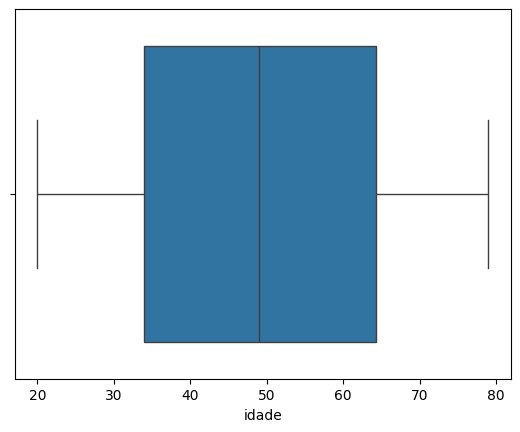

In [39]:
# Verificar / detectar outliers
sns.boxplot(x='idade', data=df_colesterol_eda)

Notamos que não temos outliers e os valores no dataset fazem sentido

<Axes: xlabel='peso'>

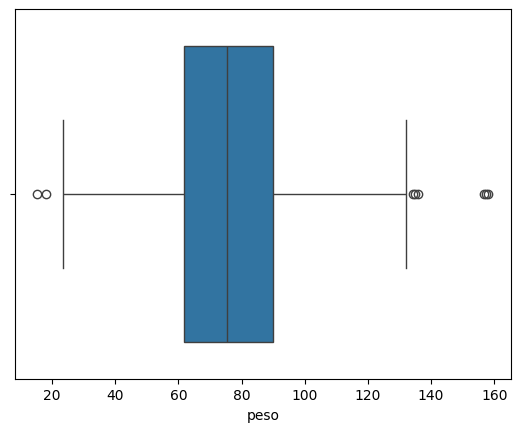

In [40]:
# Verificar / detectar outliers
sns.boxplot(x='peso', data=df_colesterol_eda)

Notamos outliers nos dados do peso, muito mais pra cima do que abaixo.
Porém, pessoas acima de 130 kilos como mostra no outlier fazem sentido no dataframe por que podem ser pessoas acima do peso buscando exames de colesterol
já pessoas com menos de 20 kilos não faz sentido pela idade.

In [43]:
# Filtrar o publico a ser removido
df_colesterol_eda[(df_colesterol_eda['peso'] < 40)].peso.count()

37

Vamos remover esses 37 individuos que aparecem no dataframe com menos de 40 kilos para fazer mais sentido.

In [44]:
# Remover publico do dataframe
df_colesterol_eda.drop(df_colesterol_eda[(df_colesterol_eda['peso'] < 40)].index, inplace=True)

In [45]:
#Estrutura do dataframe
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


<Axes: xlabel='altura'>

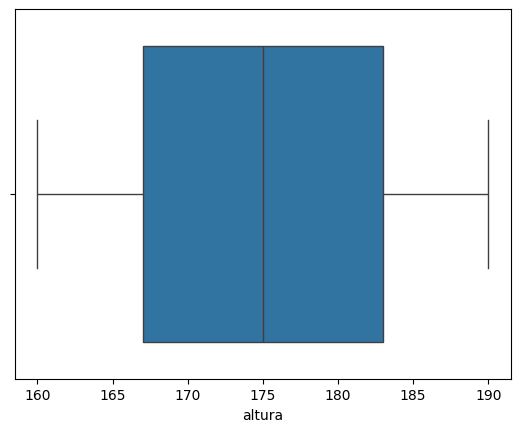

In [46]:
# Verificar / detectar outliers
sns.boxplot(x='altura', data=df_colesterol_eda)

<Axes: xlabel='nivel_colesterol'>

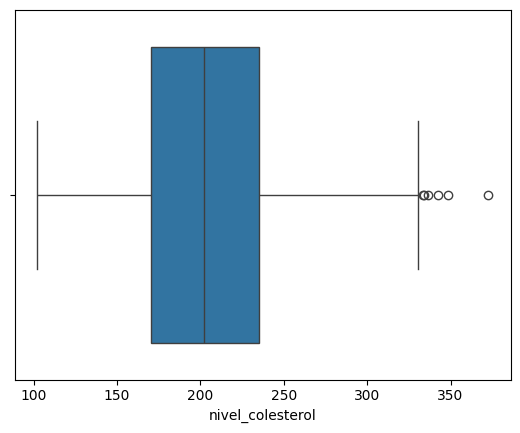

In [47]:
# Verificar / detectar outliers
sns.boxplot(x='nivel_colesterol', data=df_colesterol_eda)

Podemos ver valores extremos na parte de cima para o colesterol, porém faz sentido visto que é um exame de colesterol total (bom + ruim)

### Analise Gráfica

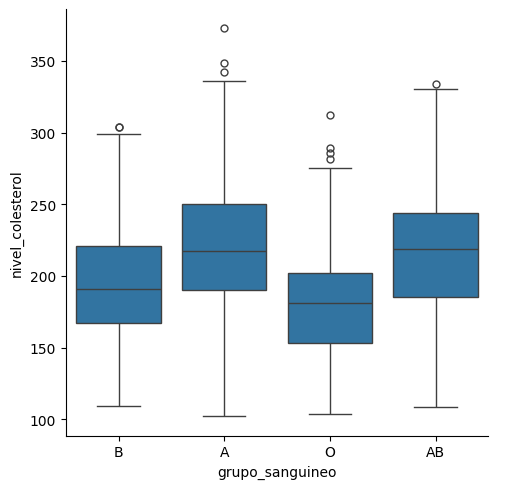

In [48]:
# Cruzamento de variaveis categorias com o nivel de colesterol
sns.catplot(x='grupo_sanguineo', y='nivel_colesterol', kind='box', data=df_colesterol_eda)

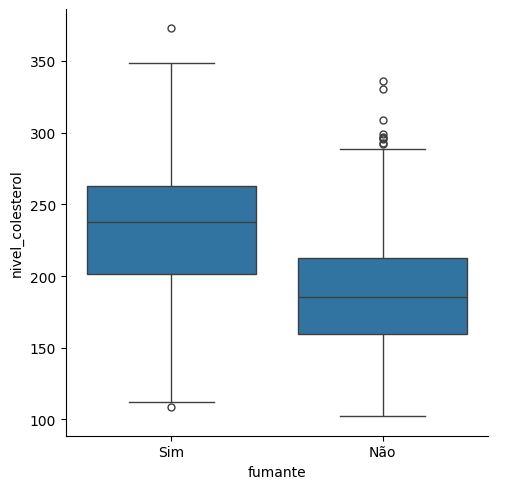

In [49]:
# Cruzamento de variaveis categorias com o nivel de colesterol
sns.catplot(x='fumante', y='nivel_colesterol', kind='box', data=df_colesterol_eda)

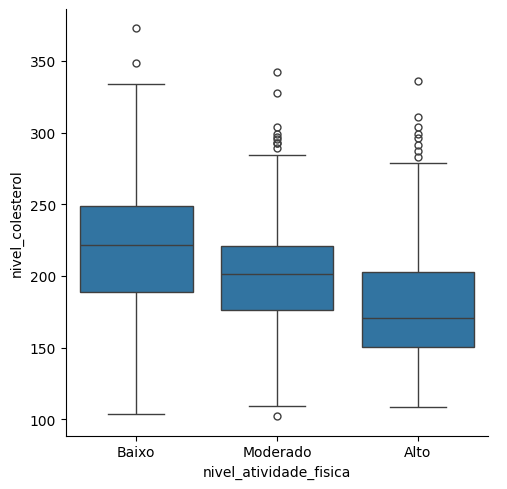

In [50]:
# Cruzamento de variaveis categorias com o nivel de colesterol
sns.catplot(x='nivel_atividade_fisica', y='nivel_colesterol', kind='box', data=df_colesterol_eda)

Analisando o cruzamento de variaveis podemos ver que existe uma certa influencia, fumantes, e grupo sanguineo aparentam ter um colesterol maior. O mesmo para atividade fisica porem inversamente influente

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

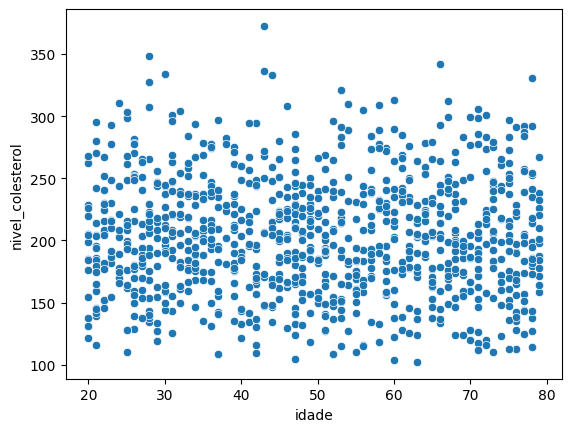

In [52]:
# Cruzamento de variaveis numericas com o nivel de colesterol isoladas
sns.scatterplot(x='idade', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

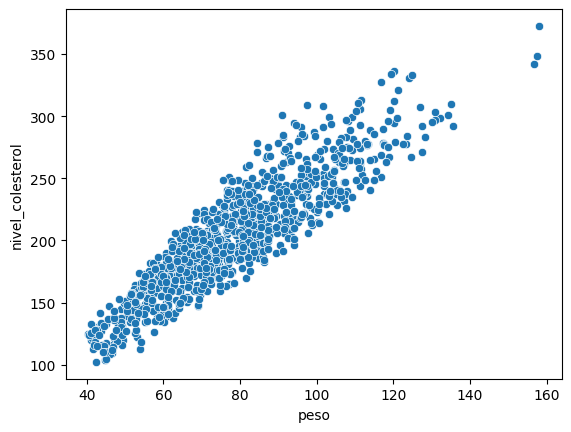

In [53]:
# Cruzamento de variaveis numericas com o nivel de colesterol isoladas
sns.scatterplot(x='peso', y='nivel_colesterol', data=df_colesterol_eda)

Podemos notar que ao isolar o peso com o nivel colesterol temos uma tendencia de alta, note tambem os outliers 

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

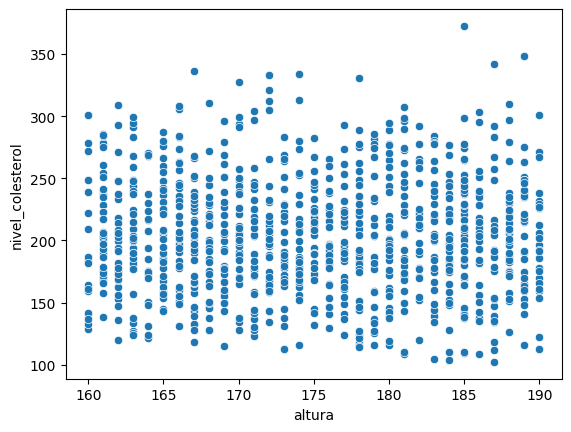

In [54]:
# Cruzamento de variaveis numericas com o nivel de colesterol isoladas
sns.scatterplot(x='altura', y='nivel_colesterol', data=df_colesterol_eda)

### Histogramas

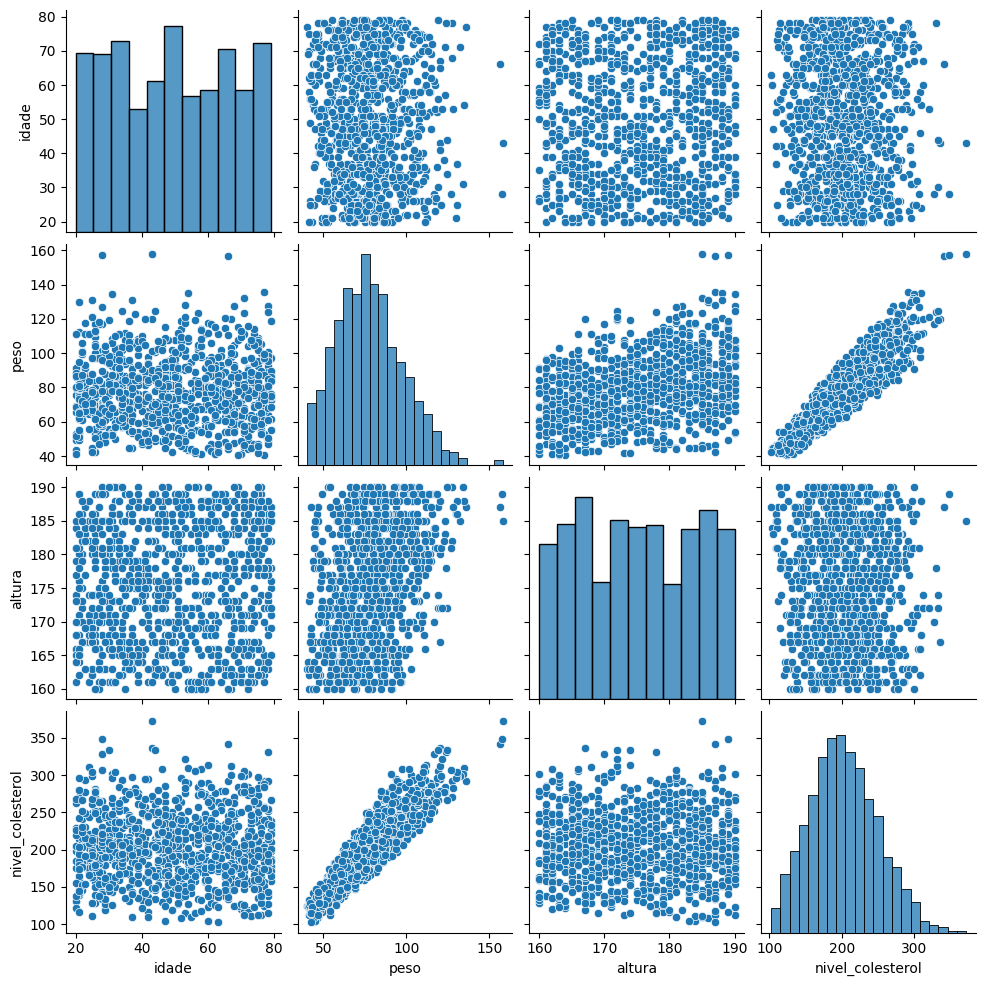

In [56]:
# Cruzamento de variaveis numericas com o nivel de colesterol geral
sns.pairplot(df_colesterol_eda)